In [1]:
from pathlib import Path

name = "librispeech-dev-clean"
in_dir = Path("data/dev-clean")
align_dir = Path("data/alignments/dev-clean")
feat_dir = Path("features")
audio_ext = ".flac" 

In [2]:
from encode import sample_files
from utils.features import DataSet

dataset = DataSet(
    name, in_dir, align_dir, feat_dir, audio_ext 
)

sample_size = 300
gamma = 0.2
out_dir_dusted = Path(f"output/dusted/{sample_size}")

sampled_paths = sample_files(dataset, sample_size)
print(len(sampled_paths))

300


In [ ]:
from encode import get_units
# from joblib import Parallel, delayed

# results = Parallel(n_jobs=2)([
#     delayed(get_units)(dataset, "dusted", sampled_paths, gamma, True),  
# ])
# dusted_words = results[0]

dusted_words = get_units(dataset, "dataset", sampled_paths, gamma, True)

Using cache found in /Users/daneladendorff/.cache/torch/hub/bshall_hubert_main
Getting units: 100%|██████████| 300/300 [01:11<00:00,  4.21it/s]


In [5]:
from utils.features import load_units_from_paths
from joblib import Parallel, delayed

results = Parallel(n_jobs=2)([
    delayed(load_units_from_paths)(dataset, "dusted", sampled_paths, gamma=0.2),  
])

dusted_words = results[0]

KeyboardInterrupt: 

In [5]:
from distance import calculate_distance

# If calculate_distance is called with only the words, it does not save the matrices
dist_mat_dusted = calculate_distance(dusted_words, out_dir_dusted, 1)

Calculating Distances: 100%|██████████| 27213753/27213753 [01:38<00:00, 276061.69it/s]


[[0.         1.         1.         1.         1.        ]
 [1.         0.         1.         1.         0.84210526]
 [1.         1.         0.         1.         1.        ]
 [1.         1.         1.         0.         1.        ]
 [1.         0.84210526 1.         1.         0.        ]]


In [6]:
from utils.features import get_words_and_dist_mat

dusted_words, dist_mat_dusted = get_words_and_dist_mat(dataset, "dusted", out_dir_dusted, sample_size, gamma)

FileNotFoundError: [Errno 2] No such file or directory: 'output/dusted/50/words.csv'

In [6]:
from utils.features import display_words

true_words = display_words(dusted_words)

Sorted Word Counts


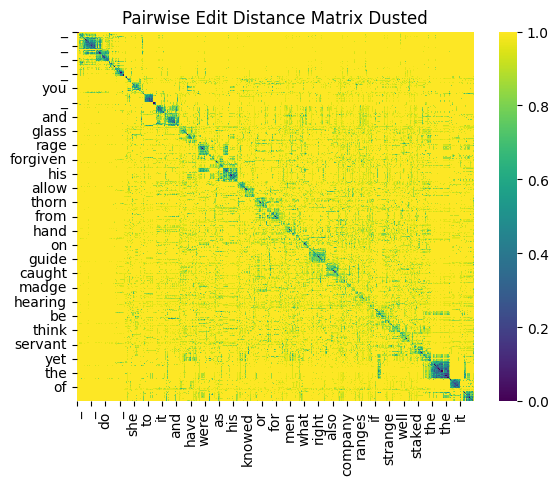

In [8]:
from eval import pairwise_edit_dist_mat

# Visualise the distances
pairwise_edit_dist_mat(dist_mat_dusted, "Pairwise Edit Distance Matrix Dusted", true_words)

In [9]:
from cluster import cluster, get_word_clusters

# Get the int_clusters for each of the matrices
dust_clusters = cluster(dist_mat_dusted, 0.2)

# Convert these to word clusters
dust_word_clusters = get_word_clusters(dust_clusters, dusted_words)

Getting Word Clusters: 100%|██████████| 5858/5858 [00:00<00:00, 7776.89it/s]


In [10]:
from cluster import get_loaded_clusters

dust_word_clusters = get_loaded_clusters(dusted_words)

In [11]:
from eval import ned

# Compute the ned for my dusted and hubert clusters - atm my NED is computed only using clusters with > 1 words
ned_dusted = ned(dust_word_clusters, print_pure=False, print_inpure=True)
print(f"DUSTED NED: {ned_dusted}")

Calculating NED: 100%|██████████| 5858/5858 [00:00<00:00, 240100.78it/s]

Cluster 30: 0.3181818181818182
a, a, a, a, a, a, o, a, a, a, i, a

Cluster 38: 0.11833185971117005
the, the, the, the, the, the, they, the, the, the, the, the, the, the, their, the, the, the, the, the, the, that, the, the, the, the, the, the, the, that, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the, the

Cluster 55: 1
a, a, it, a

Cluster 68: 0.9146341463414634
his, as, his, as, his, is, as, is, has, is, his, his, as, his, as, his, his, his, is, as, his, his, his, as, as, as, is, his, his, as, is, his, his, his, is, is, is, is, his, his, his

Cluster 122: 0.3157894736842105
he, he, he, he, he, he, he, he, he, 

In [ ]:
from cluster import get_best_clusters

ned_dusted, duplicate_count_dusted, dust_word_clusters = get_best_clusters(dust_word_clusters, ned_dusted, max_iter=5)

Iteration 0: NED: 0.108615, Duplicates: 4249


Calculating NED: 100%|██████████| 5858/5858 [00:00<00:00, 1074061.59it/s]


Iteration 1: NED: 0.071009


Calculating NED: 100%|██████████| 5858/5858 [00:00<00:00, 1033883.14it/s]


Iteration 2: NED: 0.069990


Get Distances to Centroids:   9%|▉         | 534/5858 [00:11<02:00, 44.22it/s]

In [13]:
from utils.features import store_words

# Store words associated with these clusters
store_words(dust_word_clusters, out_dir_dusted)

Wrote words to output/dusted/100/words.csv


In [14]:
from eval import words_from_word_units, clusters_purity
            
dust_just_words_clusters = words_from_word_units(dust_word_clusters)
inpurity, total = clusters_purity(dust_just_words_clusters)
print(f"{total} Dusted Clusters with inpurity: {round(inpurity*100, 3)}%")

2014 Dusted Clusters with inpurity: 58.143%


In [15]:
from eval import calculate_duplicate_clusters

cluster_counts_dusted, duplicate_counts_dusted = calculate_duplicate_clusters(dust_word_clusters, print_clusters=True)

Total duplicate clusters (considering word frequency): 1333
Duplicate clusters and their counts:
{'_': 4}: 3 times
{'preface': 1}: 2 times
{'to': 1}: 40 times
{'_': 1}: 163 times
{'second': 1}: 2 times
{'_': 2}: 20 times
{'he': 1}: 24 times
{'did': 1}: 4 times
{'himself': 1}: 2 times
{'into': 1}: 7 times
{'the': 5}: 2 times
{'go': 1}: 2 times
{'out': 1}: 7 times
{'but': 1}: 17 times
{'when': 1}: 4 times
{'in': 1}: 18 times
{'thought': 1}: 3 times
{'saw': 1}: 2 times
{'man': 1}: 3 times
{'him': 1}: 4 times
{'and': 4}: 3 times
{'went': 1}: 2 times
{'was': 2}: 3 times
{'on': 1}: 12 times
{'with': 1}: 9 times
{'_': 10}: 2 times
{'and': 1}: 49 times
{'against': 1}: 2 times
{'it': 1}: 28 times
{'best': 1}: 2 times
{'therefore': 1}: 3 times
{'his': 1}: 17 times
{'arms': 1}: 2 times
{'head': 1}: 4 times
{'reserve': 1}: 2 times
{'for': 1}: 14 times
{'occasion': 1}: 2 times
{'_': 3}: 6 times
{'said': 1}: 7 times
{'she': 2}: 5 times
{'would': 1}: 6 times
{'them': 1}: 7 times
{'if': 1}: 5 times
{'

In [ ]:
from encode import sample_files
from utils.features import load_units_from_paths
from encode import get_units
from cluster import get_distance_to_centroids, get_cluster_centroids
import editdistance
import statistics

query_path = sample_files(dataset, sample_size=1)

# Query one of the ladys
# query_path = [Path("data/dev-clean/174/50561/174-50561-0013.flac")]

query_dusted_words = load_units_from_paths(dataset, "dusted", query_path, gamma=0.2)
if not query_dusted_words:
    query_dusted_words = get_units(dataset, "dusted", query_path, gamma=0.2, save=True)
query_dusted_sentence = " ".join([w.true_word for w in query_dusted_words])

dust_centroids = get_cluster_centroids(dust_word_clusters)
query_dusted_words = get_distance_to_centroids([query_dusted_words], dust_centroids)


predictions = []
query_distances = []
for word in query_dusted_words:
    prediction = dust_centroids[word.cluster_id].true_word
    # print(" : ".join([word.true_word, prediction]))
    query_distances.append(editdistance.eval(word.true_word, prediction)/max(len(word.true_word), len(prediction)))
    predictions.append(prediction)

prediction_sentence = " ".join(predictions)
print(f"NED for query: {statistics.mean(query_distances)}")
print(query_dusted_sentence)
print(prediction_sentence)

Loading Units: 100%|██████████| 1/1 [00:00<00:00, 616.45it/s]
Using cache found in /Users/daneladendorff/.cache/torch/hub/bshall_dusted_main
Using cache found in /Users/daneladendorff/.cache/torch/hub/bshall_dusted_main
Using cache found in /Users/daneladendorff/.cache/torch/hub/bshall_hubert_main
Get Distances to Centroids: 100%|██████████| 1/1 [00:00<00:00,  9.88it/s]

NED for query: 0.4868097643097643
_ that enchantment had possessed him _ usurping as it were the throne of his life and displacing it _ when it ceased _ he was not his own master
_ that into _ best on _ see is a were the an a is i in still it _ an it _ _ a is not is on mister
